In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
import os

In [3]:
states = pd.read_csv('./data/data.csv')

In [4]:
states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [5]:
new_york = states.loc[states['state'] == "New York"]

In [6]:
new_york.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [7]:
new_york.size

150

In [8]:
new_york.rename(columns={'date': 'ds', 'cases': 'y'}, inplace=True)

C:\Users\Jeff\anaconda3\envs\prophet\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
new_york.head()

,ds,state,fips,y,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [10]:
m = Prophet()
m.fit(new_york)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [11]:
future = m.make_future_dataframe(periods=20)
future.tail()


,ds
45,2020-04-15
46,2020-04-16
47,2020-04-17
48,2020-04-18
49,2020-04-19


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
45,2020-04-15,68333.601172,54545.165343,83134.848195
46,2020-04-16,70286.612049,56476.382522,84223.058149
47,2020-04-17,72465.621893,57654.128332,86585.710071
48,2020-04-18,75519.747692,61278.545516,89740.840473
49,2020-04-19,81131.561664,67270.354605,95622.127376


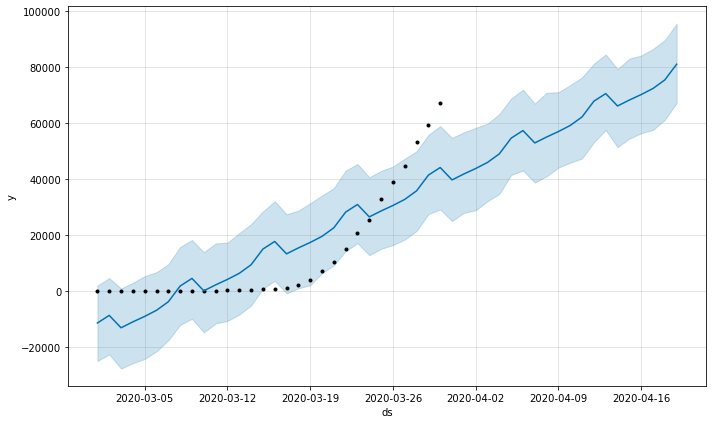

In [13]:
fig1 = m.plot(forecast)